# Diagnosing breast cancer using clustering

### 1-Importing libraries

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA, KernelPCA 
from sklearn.preprocessing import StandardScaler

In [2]:
#Importing data
file=r'C:/Users/bc/Desktop/donnee vente/BreastCancer .csv'
data=pd.read_csv(file)

In [3]:
#Show the first 5 rows
data.head()

,Sample code number,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


### 7.2.1 Business Understanding

#### Attributes of the Breast Cancer Wisconsin data set

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Sample code number           699 non-null    int64  
 1   Clump thickness              699 non-null    int64  
 2   Uniformity of cell cize      699 non-null    int64  
 3   Uniformity of cell shape     699 non-null    int64  
 4   Marginal adhesion            699 non-null    int64  
 5   Single epithelial cell size  699 non-null    int64  
 6   Bare nuclei                  683 non-null    float64
 7   Bland chromatin              699 non-null    int64  
 8   Normal nucleoli              699 non-null    int64  
 9   Mitoses                      699 non-null    int64  
 10  Class                        699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


### 7.2.3 Data Preparation

In [5]:
data.isna().sum()

Sample code number              0
Clump thickness                 0
Uniformity of cell cize         0
Uniformity of cell shape        0
Marginal adhesion               0
Single epithelial cell size     0
Bare nuclei                    16
Bland chromatin                 0
Normal nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

The “bare nuclei” attribute has 16 missing values. This is the unique quality
problem of the data set. Since the dataset has 699 instances, to remove 16 of
them is not problematic. we remove it

In [6]:
data.describe()

,Sample code number,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [7]:
#Delete rows that contain missing values.we have 16 missing values
new_data=data.dropna()

In [8]:
new_data

,Sample code number,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2.0,1,1,1,2
695,841769,2,1,1,1,2,1.0,1,1,1,2
696,888820,5,10,10,3,7,3.0,8,10,2,4
697,897471,4,8,6,4,3,4.0,10,6,1,4


In [9]:
new_data.describe()

,Sample code number,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [10]:
#Storage of column names of our dataframe because we will use it later.la method to list to have a list
features=new_data.columns.tolist()
features

['Sample code number',
 'Clump thickness',
 'Uniformity of cell cize',
 'Uniformity of cell shape',
 'Marginal adhesion',
 'Single epithelial cell size',
 'Bare nuclei',
 'Bland chromatin',
 'Normal nucleoli',
 'Mitoses',
 'Class']

###   Principal Component Analysis (PCA)

##### a) Linear PCA

We will reduce the dimention of our data frame to two main components in order to be able to visualize the results in a 2D plane. Let's start by removing the variable "Sample code number" which is not numeric.

In [11]:
data2=new_data.drop('Sample code number',axis=1)
data2.head()

,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [12]:
#PCA needs to standardize the data we need to put it on the same scale
scaler=StandardScaler()
data2=scaler.fit_transform(data2)
type(data2)

numpy.ndarray

In [13]:
data2

array([[ 0.19790469, -0.70221201, -0.74177362, ..., -0.61292736,
        -0.34839971, -0.73368133],
       [ 0.19790469,  0.27725185,  0.26278299, ..., -0.28510482,
        -0.34839971, -0.73368133],
       [-0.51164337, -0.70221201, -0.74177362, ..., -0.61292736,
        -0.34839971, -0.73368133],
       ...,
       [ 0.19790469,  2.23617957,  2.2718962 , ...,  2.33747554,
         0.22916583,  1.36298958],
       [-0.15686934,  1.58320366,  0.93248739, ...,  1.02618536,
        -0.34839971,  1.36298958],
       [-0.15686934,  1.58320366,  1.6021918 , ...,  0.37054027,
        -0.34839971,  1.36298958]])

In [14]:
#apply the PCA to four components
pca=PCA(n_components=2)
res_pca=pca.fit_transform(data2)
type(res_pca)

numpy.ndarray

In [15]:
#print result
res_pca

array([[-1.63333457, -0.10118309],
       [ 1.09275267, -0.3679174 ],
       [-1.74849505, -0.06840633],
       ...,
       [ 4.0177012 , -0.02068081],
       [ 2.57900007, -1.0797101 ],
       [ 2.94612892, -1.14528796]])

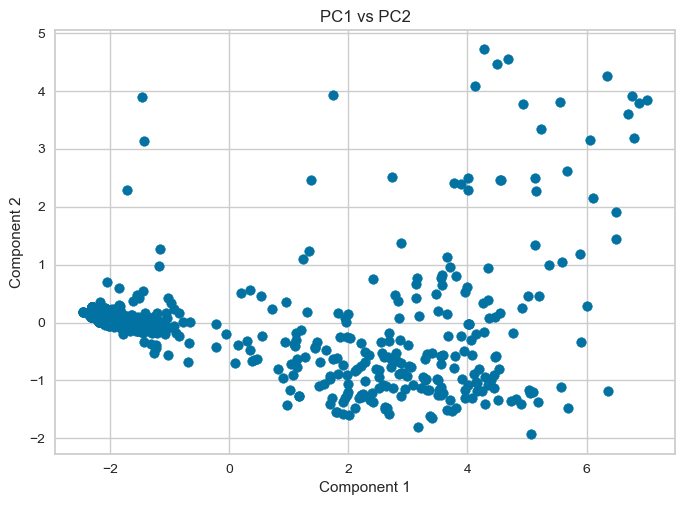

In [16]:
#Visualization of the main components
plt.scatter(res_pca[:,0],res_pca[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PC1 vs PC2")
plt.show()


In [17]:
#Pearson correlation coefficient obtained after PCA
pearsonr(res_pca[:,0],res_pca[:,1])

PearsonRResult(statistic=-2.719179048593645e-16, pvalue=1.000000000000795)

#### b)No lenear PCA

In [18]:
kpca=KernelPCA(n_components=2, kernel='rbf')
res_kpca=kpca.fit_transform(data2)
res_kpca

array([[-0.3430763 ,  0.25011728],
       [ 0.42676024,  0.16046444],
       [-0.39446781,  0.02521316],
       ...,
       [ 0.66117913, -0.21886057],
       [ 0.64130665, -0.04887289],
       [ 0.67467399, -0.08350293]])

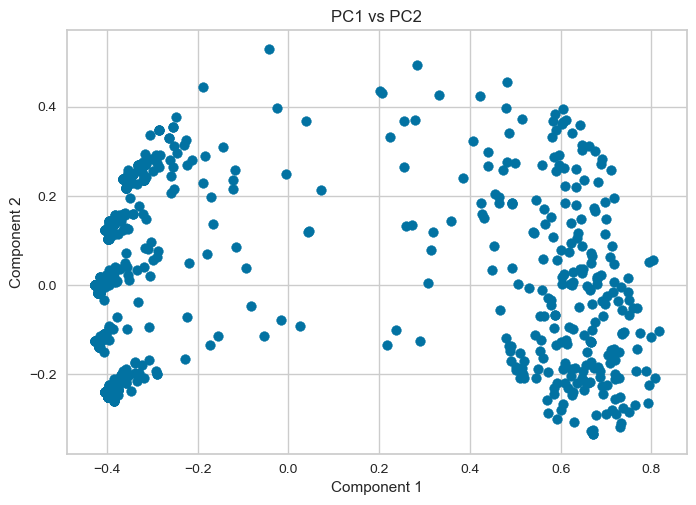

In [19]:
#Visualization of the main components
plt.scatter(res_kpca[:,0],res_kpca[:,1])
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("PC1 vs PC2")
plt.show()

**We see that non-linear PCA gives a better result. We will use it in the rest of the work**

### Clustering with k-means with k = 2

In [20]:
cluster_model=KMeans(n_clusters=2)
cluster_model.fit(res_kpca)
clusters=cluster_model.predict(res_kpca)

In [21]:
len(clusters)

683

In [22]:
#affichage des clusters
clusters

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,

we have  2 clusters 

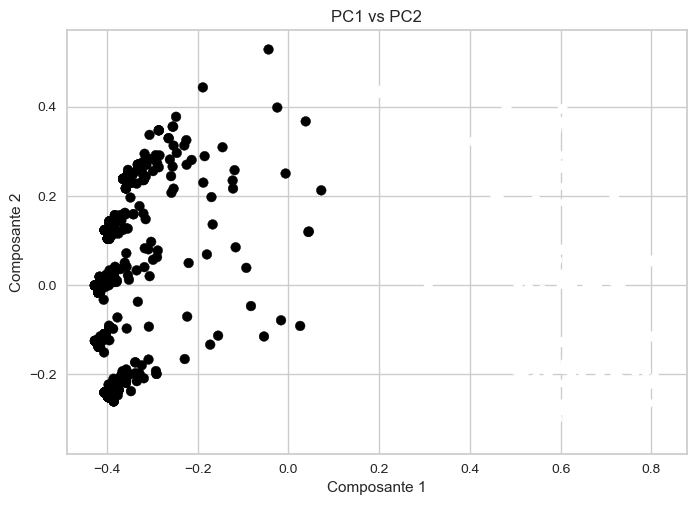

In [23]:

#Revisualization of major components
plt.scatter(res_kpca[:,0],res_kpca[:,1],c=clusters)
plt.xlabel("Composante 1")
plt.ylabel("Composante 2")
plt.title("PC1 vs PC2")
plt.show()


In [24]:
#Let's back up clusters
new_data['cluster_pca']=clusters
new_data.to_csv('data_with_cluster.csv')

C:\Users\bc\AppData\Local\Temp\ipykernel_10784\3941360712.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['cluster_pca']=clusters


In [25]:
new_data.reset_index(inplace=True)
new_data

,index,Sample code number,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class,cluster_pca
0,0,1000025,5,1,1,1,2,1.0,3,1,1,2,1
1,1,1002945,5,4,4,5,7,10.0,3,2,1,2,0
2,2,1015425,3,1,1,1,2,2.0,3,1,1,2,1
3,3,1016277,6,8,8,1,3,4.0,3,7,1,2,0
4,4,1017023,4,1,1,3,2,1.0,3,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,694,776715,3,1,1,1,3,2.0,1,1,1,2,1
679,695,841769,2,1,1,1,2,1.0,1,1,1,2,1
680,696,888820,5,10,10,3,7,3.0,8,10,2,4,0
681,697,897471,4,8,6,4,3,4.0,10,6,1,4,0


##### Since clusters have been identified, they should be interpreted

In [26]:
#You can load the previously saved file
dataframe=pd.read_csv('data_with_cluster.csv',index_col=0)

In [27]:

dataframe.head()

,Sample code number,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,Class,cluster_pca
0,1000025,5,1,1,1,2,1.0,3,1,1,2,1
1,1002945,5,4,4,5,7,10.0,3,2,1,2,0
2,1015425,3,1,1,1,2,2.0,3,1,1,2,1
3,1016277,6,8,8,1,3,4.0,3,7,1,2,0
4,1017023,4,1,1,3,2,1.0,3,1,1,2,1


In [28]:
dataframe2=dataframe.drop(['Class','Sample code number'],axis=1)
dataframe2.head()

,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,cluster_pca
0,5,1,1,1,2,1.0,3,1,1,1
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,1
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,1


In [29]:
dataframe2.reset_index(inplace=True)

In [30]:
len(new_data.index)

683

In [31]:
dataframe2.shape

(683, 11)

In [32]:
dataframe2['cluster_pca']

0      1
1      0
2      1
3      0
4      1
      ..
678    1
679    1
680    0
681    0
682    0
Name: cluster_pca, Length: 683, dtype: int64

In [121]:
nv_val =[]
for i in np.arange(len(dataframe2.index)):
    if dataframe2.cluster_pca[i]==0:
        nv_val.append("Cluster 2")
    else:
        nv_val.append("Cluster 1")

In [122]:
dataframe3=dataframe2.assign(categorie_cluster=nv_val)

In [123]:
dataframe3

,index,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,cluster_pca,categorie_cluster
0,0,5,1,1,1,2,1.0,3,1,1,1,Cluster 1
1,1,5,4,4,5,7,10.0,3,2,1,0,Cluster 2
2,2,3,1,1,1,2,2.0,3,1,1,1,Cluster 1
3,3,6,8,8,1,3,4.0,3,7,1,0,Cluster 2
4,4,4,1,1,3,2,1.0,3,1,1,1,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...
678,694,3,1,1,1,3,2.0,1,1,1,1,Cluster 1
679,695,2,1,1,1,2,1.0,1,1,1,1,Cluster 1
680,696,5,10,10,3,7,3.0,8,10,2,0,Cluster 2
681,697,4,8,6,4,3,4.0,10,6,1,0,Cluster 2


In [124]:
dataframe3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        683 non-null    int64  
 1   Clump thickness              683 non-null    int64  
 2   Uniformity of cell cize      683 non-null    int64  
 3   Uniformity of cell shape     683 non-null    int64  
 4   Marginal adhesion            683 non-null    int64  
 5   Single epithelial cell size  683 non-null    int64  
 6   Bare nuclei                  683 non-null    float64
 7   Bland chromatin              683 non-null    int64  
 8   Normal nucleoli              683 non-null    int64  
 9   Mitoses                      683 non-null    int64  
 10  cluster_pca                  683 non-null    int64  
 11  categorie_cluster            683 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 64.2+ KB


In [125]:
features3=dataframe3.columns.tolist()
features3

['index',
 'Clump thickness',
 'Uniformity of cell cize',
 'Uniformity of cell shape',
 'Marginal adhesion',
 'Single epithelial cell size',
 'Bare nuclei',
 'Bland chromatin',
 'Normal nucleoli',
 'Mitoses',
 'cluster_pca',
 'categorie_cluster']

In [126]:
features3.pop(0)

'index'

In [127]:
features3.pop(9)

'cluster_pca'

In [128]:
features3

['Clump thickness',
 'Uniformity of cell cize',
 'Uniformity of cell shape',
 'Marginal adhesion',
 'Single epithelial cell size',
 'Bare nuclei',
 'Bland chromatin',
 'Normal nucleoli',
 'Mitoses',
 'categorie_cluster']

In [129]:
resultat=dataframe3.groupby('categorie_cluster')[features3].mean()
resultat

,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses
categorie_cluster,,,,,,,,,
Cluster 1,2.909091,1.216783,1.319347,1.277389,1.997669,1.235431,2.032634,1.156177,1.030303
Cluster 2,7.031496,6.417323,6.417323,5.452756,5.322835,7.444882,5.830709,5.763780,2.570866


In [130]:
resultat_transpose=resultat.T
resultat_transpose

categorie_cluster,Cluster 1,Cluster 2
Clump thickness,2.909091,7.031496
Uniformity of cell cize,1.216783,6.417323
Uniformity of cell shape,1.319347,6.417323
Marginal adhesion,1.277389,5.452756
Single epithelial cell size,1.997669,5.322835
Bare nuclei,1.235431,7.444882
Bland chromatin,2.032634,5.830709
Normal nucleoli,1.156177,5.763780
Mitoses,1.030303,2.570866


### 7.2.4 Modeling

### Figure 7.2 Centroids for k-means with k = 2, where the benign breast mass is Cluster 1.

<AxesSubplot:>

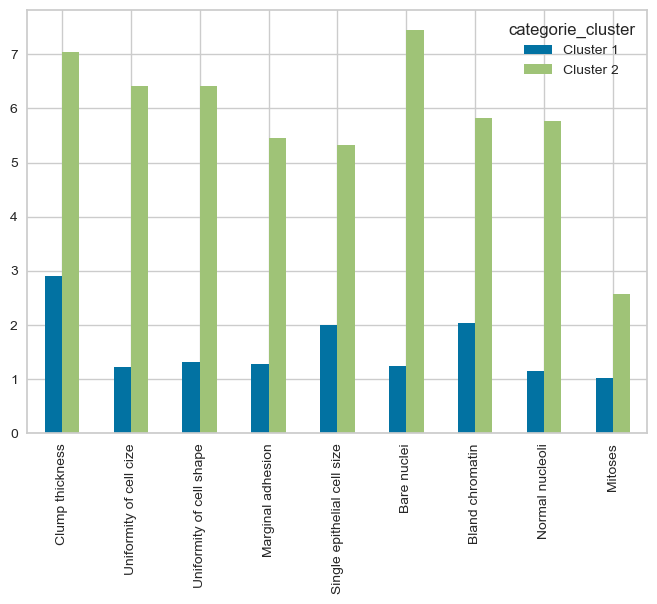

In [131]:
resultat_transpose.plot.bar()

### Centroids for k-means with k = 3

In [44]:
cluster_model2=KMeans(n_clusters=3)
cluster_model2.fit(res_kpca)
clusters2=cluster_model2.predict(res_kpca)

In [45]:
clusters2

array([0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 1,
       2, 2, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1,
       1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2,
       2, 2, 0, 2, 2, 2, 2, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       1, 1, 0, 2, 0, 1, 2, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 2, 1, 2,
       2, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2,
       1, 1, 0, 2, 1, 0, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 1, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0,
       2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 1, 0, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 2, 2, 2, 2, 0, 1, 1, 0,
       2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 0,
       1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1,

we have 3 cluster

In [46]:
#ajout des clusters aux data frame et sauvegarde de fichier
dataframe3['cluster_pcak2']=clusters2
dataframe3.to_csv('data_with_two_cluster.csv')#on enregistre le contenu dans un fichier csv et on peut partager notre fichier avec les clusters

In [47]:
#on peut charger le fichier précedement enregistré
dataframe4=pd.read_csv('data_with_two_cluster.csv',index_col=0)

In [48]:
dataframe4

,index,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses,cluster_pca,categorie_cluster,cluster_pcak2
0,0,5,1,1,1,2,1.0,3,1,1,1,Cluster 2,0
1,1,5,4,4,5,7,10.0,3,2,1,0,Cluster 1,1
2,2,3,1,1,1,2,2.0,3,1,1,1,Cluster 2,2
3,3,6,8,8,1,3,4.0,3,7,1,0,Cluster 1,1
4,4,4,1,1,3,2,1.0,3,1,1,1,Cluster 2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
678,694,3,1,1,1,3,2.0,1,1,1,1,Cluster 2,2
679,695,2,1,1,1,2,1.0,1,1,1,1,Cluster 2,2
680,696,5,10,10,3,7,3.0,8,10,2,0,Cluster 1,1
681,697,4,8,6,4,3,4.0,10,6,1,0,Cluster 1,1


In [76]:
nv_val2 =[]
for i in np.arange(len(dataframe4.index)):
    if dataframe4.cluster_pcak2[i]==0:
        nv_val2.append("Cluster 2")
    elif dataframe4.cluster_pcak2[i]==1:
        nv_val2.append("Cluster 3")
    else:
        nv_val2.append("Cluster 1")

In [77]:
dataframe5=dataframe4.assign(categorie_cluster2=nv_val2)
features4=dataframe5.columns.tolist()
features4

['index',
 'Clump thickness',
 'Uniformity of cell cize',
 'Uniformity of cell shape',
 'Marginal adhesion',
 'Single epithelial cell size',
 'Bare nuclei',
 'Bland chromatin',
 'Normal nucleoli',
 'Mitoses',
 'cluster_pca',
 'categorie_cluster',
 'cluster_pcak2',
 'categorie_cluster2']

In [78]:
features4

['index',
 'Clump thickness',
 'Uniformity of cell cize',
 'Uniformity of cell shape',
 'Marginal adhesion',
 'Single epithelial cell size',
 'Bare nuclei',
 'Bland chromatin',
 'Normal nucleoli',
 'Mitoses',
 'cluster_pca',
 'categorie_cluster',
 'cluster_pcak2',
 'categorie_cluster2']

In [79]:
features4.pop(0)

'index'

In [80]:
features4.pop(9)

'cluster_pca'

In [81]:
features4.pop(9)

'categorie_cluster'

In [82]:
features4.pop(9)

'cluster_pcak2'

In [83]:
resultat2=dataframe5.groupby('categorie_cluster2')[features4].mean()
resultat2

,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses
categorie_cluster2,,,,,,,,,
Cluster 1,1.746988,1.108434,1.168675,1.136546,1.939759,1.188755,1.991968,1.068273,1.028112
Cluster 2,4.543956,1.390110,1.554945,1.478022,2.087912,1.313187,2.109890,1.285714,1.032967
Cluster 3,7.031746,6.440476,6.436508,5.480159,5.341270,7.484127,5.845238,5.793651,2.583333


In [84]:
resultat_transpose2=resultat2.T
resultat_transpose2

categorie_cluster2,Cluster 1,Cluster 2,Cluster 3
Clump thickness,1.746988,4.543956,7.031746
Uniformity of cell cize,1.108434,1.390110,6.440476
Uniformity of cell shape,1.168675,1.554945,6.436508
Marginal adhesion,1.136546,1.478022,5.480159
Single epithelial cell size,1.939759,2.087912,5.341270
Bare nuclei,1.188755,1.313187,7.484127
Bland chromatin,1.991968,2.109890,5.845238
Normal nucleoli,1.068273,1.285714,5.793651
Mitoses,1.028112,1.032967,2.583333


### Figure 7.3 Centroids for k-means with k = 3, where the benign breast mass is Cluster 1.

<AxesSubplot:>

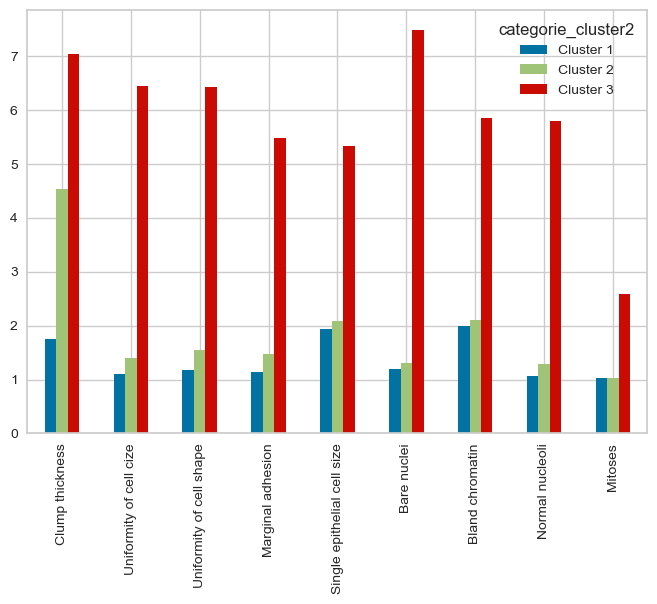

In [85]:
resultat_transpose2.plot.bar()

### Centroids for k-means with k = 4

In [88]:
cluster_model3=KMeans(n_clusters=5)
cluster_model3.fit(res_kpca)
clusters3=cluster_model3.predict(res_kpca)

In [89]:
dataframe5['cluster_pcak3']=clusters3

In [109]:
nv_val3 =[]
for i in np.arange(len(dataframe5.index)):
    if dataframe5.cluster_pcak3[i]==0:
        nv_val3.append("Cluster 2")
    elif dataframe5.cluster_pcak3[i]==1:
        nv_val3.append("Cluster 4")
    elif dataframe5.cluster_pcak3[i]==2:
        nv_val3.append("Cluster 1")
    else:
        nv_val3.append("Cluster 3")

In [110]:
dataframe6=dataframe5.assign(categorie_cluster3=nv_val3)
features6=dataframe6.columns.tolist()
features6

['index',
 'Clump thickness',
 'Uniformity of cell cize',
 'Uniformity of cell shape',
 'Marginal adhesion',
 'Single epithelial cell size',
 'Bare nuclei',
 'Bland chromatin',
 'Normal nucleoli',
 'Mitoses',
 'cluster_pca',
 'categorie_cluster',
 'cluster_pcak2',
 'categorie_cluster2',
 'cluster_pcak3',
 'categorie_cluster3']

In [111]:
features6.pop(0)

'index'

In [112]:
features6.pop(9)

'cluster_pca'

In [113]:
features6.pop(9)

'categorie_cluster'

In [114]:
features6.pop(9)

'cluster_pcak2'

In [115]:
features6.pop(9)

'categorie_cluster2'

In [116]:
features6.pop(9)

'cluster_pcak3'

In [117]:
resultat3=dataframe6.groupby('categorie_cluster3')[features6].mean()
resultat3

,Clump thickness,Uniformity of cell cize,Uniformity of cell shape,Marginal adhesion,Single epithelial cell size,Bare nuclei,Bland chromatin,Normal nucleoli,Mitoses
categorie_cluster3,,,,,,,,,
Cluster 1,1.248588,1.112994,1.197740,1.135593,1.949153,1.231638,1.988701,1.067797,1.033898
Cluster 2,5.037736,1.462264,1.688679,1.584906,2.084906,1.235849,2.113208,1.367925,1.037736
Cluster 3,4.721519,2.282700,2.510549,2.151899,2.696203,3.569620,2.940928,2.139241,1.198312
Cluster 4,7.116564,7.723926,7.423313,6.466258,6.159509,7.521472,6.625767,6.865031,3.177914


In [118]:
resultat_transpose3=resultat3.T
resultat_transpose3

categorie_cluster3,Cluster 1,Cluster 2,Cluster 3,Cluster 4
Clump thickness,1.248588,5.037736,4.721519,7.116564
Uniformity of cell cize,1.112994,1.462264,2.282700,7.723926
Uniformity of cell shape,1.197740,1.688679,2.510549,7.423313
Marginal adhesion,1.135593,1.584906,2.151899,6.466258
Single epithelial cell size,1.949153,2.084906,2.696203,6.159509
Bare nuclei,1.231638,1.235849,3.569620,7.521472
Bland chromatin,1.988701,2.113208,2.940928,6.625767
Normal nucleoli,1.067797,1.367925,2.139241,6.865031
Mitoses,1.033898,1.037736,1.198312,3.177914


### Figure 7.4 Centroids for k-means with k = 4, where the benign breast mass is Clusters 1 and 2.


<AxesSubplot:>

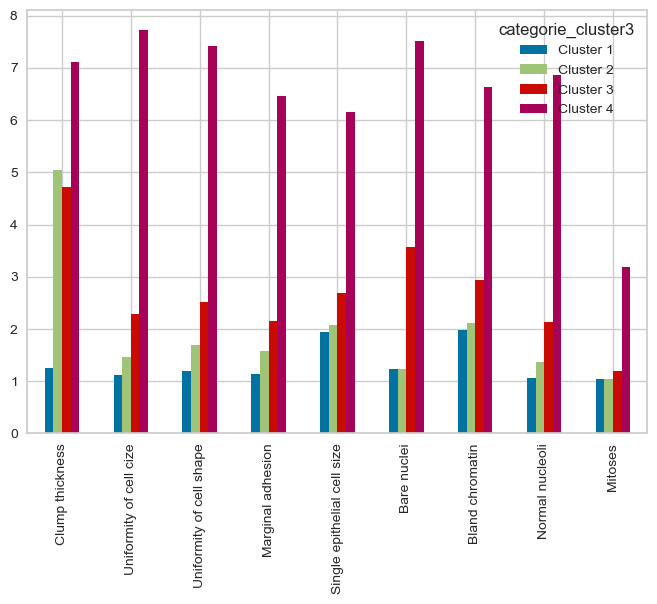

In [119]:
resultat_transpose3.plot.bar()

### Find the optimum value of k

### Figure 7.5 The elbow curve for the breast cancer problem using the average of the within-groups sum of squares

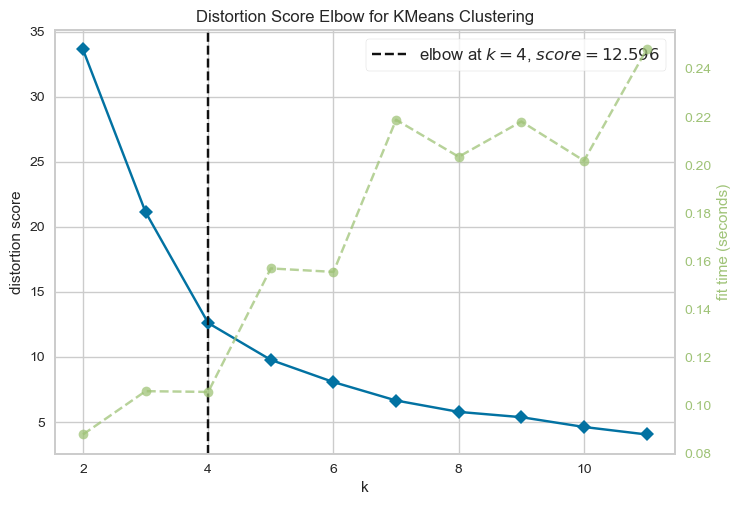

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
kmeans=KMeans()
visualiseur=KElbowVisualizer(kmeans,k=(2,12))
visualiseur.fit(res_kpca)
visualiseur.show()

**k = 4 was the value used.**